<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT <br>Assignment 3 Part 2 Group 5<br>
Training Report
</h1>

---
<br>

#### **Your UNI** : jc5635
#### **Your Full Name** : John Cheng
#### **Your AI Model Share Username**: jc5635
#### **Link to Your Public Github Repository** : https://github.com/johnc2024/HW_3_final_project
#### **Team Member Contribution Percentage** : 100%

## Stanford Sentiment Treebank - Movie Review Classification Competition


## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
# install libraries
! pip install aimodelshare
! pip install pyspark

In [ ]:
# get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


In [51]:
# import X_train, X_test, and y_train_labels
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

X_train = pd.read_csv("sst2_competition_data/X_train.csv")
X_test = pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels = pd.read_csv("sst2_competition_data/y_train_labels.csv")

In [ ]:
X_train

,text
0,The Rock is destined to be the 21st Century 's...
1,The gorgeously elaborate continuation of `` Th...
2,Singer/composer Bryan Adams contributes a slew...
3,Yet the act is still charming here .
4,Whether or not you 're enlightened by any of D...
...,...
6915,A real snooze .
6916,No surprises .
6917,We 've seen the hippie-turned-yuppie plot befo...
6918,Her fans walked out muttering words like `` ho...


In [ ]:
y_train_labels

,label
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
6915,Negative
6916,Negative
6917,Positive
6918,Negative


##2.   Preprocess data using keras tokenizer / Write and Save Preprocessor function


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np
import string
import random
import re

In [ ]:
# encode y data
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()

y_train_labels_enc = y_train_labels
y_train_labels_enc['label'] = le.fit_transform(y_train_labels_enc['label'])
y_train_labels_enc = to_categorical(y_train_labels_enc)

display(y_train_labels_enc)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X_train_list = X_train['text'].tolist()
X_test_list = X_test['text'].tolist()

In [39]:
# preprocess with Tokenizer
tokenizer = Tokenizer(num_words = 2000, oov_token = '<UNK>')
tokenizer.fit_on_texts(X_train_list)

len(tokenizer.word_index)

13836

In [40]:
train_sequences = tokenizer.texts_to_sequences(X_train_list)
train_padded = pad_sequences(train_sequences, padding = 'post', truncating = 'post', maxlen = 40)

In [41]:
test_sequences = tokenizer.texts_to_sequences(X_test_list)
test_padded = pad_sequences(test_sequences, padding = 'post', truncating = 'post', maxlen = 40)

In [19]:
X_train_preproc = preprocessor(X_train_list)
X_train_preproc.shape

(6920, 40)

In [13]:
X_test_preproc = preprocessor(X_test_list)
X_test_preproc.shape

(1821, 40)

In [46]:
len(tokenizer.word_index)

13836

In [18]:
# alternatively - define preprocessor function
def preprocessor(data):
  tokenizer = Tokenizer(num_words = 2000, oov_token = '<UNK>')
  tokenizer.fit_on_texts(data)
  # word_index = tokenizer.word_index
  sequences = tokenizer.texts_to_sequences(data)
  padded = pad_sequences(sequences, padding = 'post', truncating = 'post', maxlen = 40)
  return padded

##3. Fit model on preprocessed data and save preprocessor function and model


**Deep Learning -- Base Model**

In [20]:
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

In [21]:
np.random.seed(5)

import tensorflow as tf

# define model
dl_base = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim = 50, input_length = 40),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation = 'sigmoid') # use sigmoid for binary classification
  ])

# compile model
dl_base.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# fit model
hist_dl_base = dl_base.fit(X_train_preproc,
                           y_train_labels_enc,
                           epochs = 15,
                           verbose = 1,
                           validation_split = 0.2)

Epoch 1/15
173/173 [==============================] - 3s 13ms/step - loss: 0.6643 - accuracy: 0.6133 - val_loss: 0.8612 - val_accuracy: 0.1517
Epoch 2/15
173/173 [==============================] - 1s 7ms/step - loss: 0.5786 - accuracy: 0.6895 - val_loss: 0.7779 - val_accuracy: 0.4212
Epoch 3/15
173/173 [==============================] - 1s 6ms/step - loss: 0.4345 - accuracy: 0.8168 - val_loss: 0.6127 - val_accuracy: 0.6676
Epoch 4/15
173/173 [==============================] - 1s 6ms/step - loss: 0.3277 - accuracy: 0.8761 - val_loss: 0.6326 - val_accuracy: 0.6655
Epoch 5/15
173/173 [==============================] - 2s 9ms/step - loss: 0.2492 - accuracy: 0.9194 - val_loss: 0.6833 - val_accuracy: 0.6445
Epoch 6/15
173/173 [==============================] - 2s 10ms/step - loss: 0.1889 - accuracy: 0.9512 - val_loss: 0.6624 - val_accuracy: 0.6749
Epoch 7/15
173/173 [==============================] - 1s 6ms/step - loss: 0.1420 - accuracy: 0.9693 - val_loss: 0.7486 - val_accuracy: 0.6460
Epoc

In [22]:
# return model summary
dl_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            250000    
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 2)                 4002      
                                                                 
Total params: 254002 (992.20 KB)
Trainable params: 254002 (992.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# save model and model history
dl_base.save('dl_base.keras')
dl_base.save('dl_base.h5')

np.save('dl_base_hist.npy', dl_base.history)

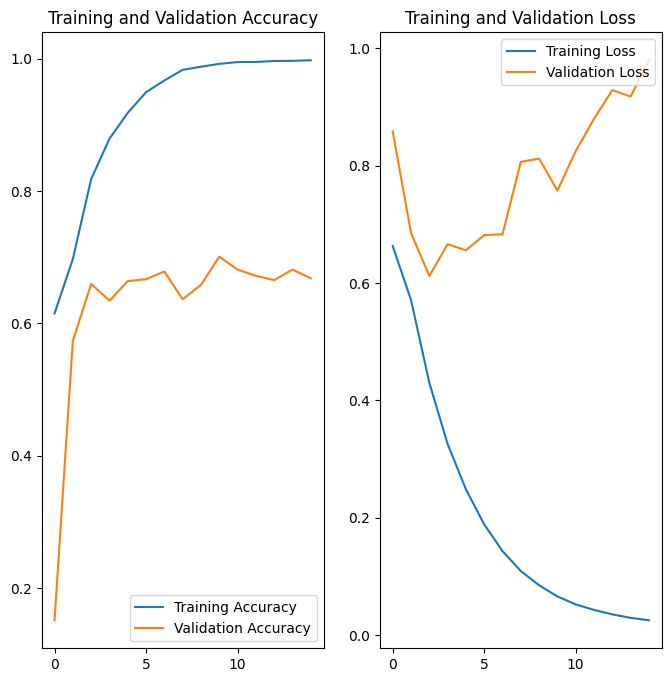

In [ ]:
# plot history
import matplotlib.pyplot as plt

train_acc_dl_base = hist_dl_base.history['accuracy']
valid_acc_dl_base = hist_dl_base.history['val_accuracy']

train_loss_dl_base = hist_dl_base.history['loss']
valid_loss_dl_base = hist_dl_base.history['val_loss']

epochs_range = range(15)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc_dl_base, label = 'Training Accuracy')
plt.plot(epochs_range, valid_acc_dl_base, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss_dl_base, label = 'Training Loss')
plt.plot(epochs_range, valid_loss_dl_base, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
# set credentials
from aimodelshare.aws import set_credentials

apiurl = 'https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m' #This is the unique rest api that powers this specific Playground

set_credentials(apiurl = apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor, '')

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
# instantiate competition
mycompetition = ai.Competition(apiurl)

In [ ]:
# save model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_dl_base = model_to_onnx(dl_base, framework = 'keras',
                          transfer_learning = False,
                          deep_learning = True)

with open('dl_base.onnx', 'wb') as f:
    f.write(onnx_dl_base.SerializeToString())

In [ ]:
# generate predicted values
dl_base_prediction_labels = dl_base.predict(X_test_preproc)
dl_base_prediction_labels

# submit to competition
mycompetition.submit_model(model = "dl_base.onnx",
                                 preprocessor = preprocessor,
                                 prediction_submission = dl_base_prediction_labels)

57/57 [==============================] - 0s 3ms/step
Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): deep_learning
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 519

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# display leaderboard
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

**Deep Learning -- LSTM**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten

In [28]:
np.random.seed(5)

import tensorflow as tf

# define model
dl_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim = 50, input_length = 40),
    tf.keras.layers.LSTM(100, return_sequences = True),
    tf.keras.layers.LSTM(100, return_sequences = True),
    tf.keras.layers.LSTM(100, return_sequences = True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation = 'sigmoid') # use sigmoid for binary classification
  ])

# compile model
dl_lstm.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# fit model
hist_dl_lstm = dl_lstm.fit(X_train_preproc,
                           y_train_labels_enc,
                           epochs = 15,
                           verbose = 1,
                           validation_split = 0.2)

Epoch 1/15
173/173 [==============================] - 33s 145ms/step - loss: 0.6007 - accuracy: 0.6712 - val_loss: 0.7986 - val_accuracy: 0.5014
Epoch 2/15
173/173 [==============================] - 32s 186ms/step - loss: 0.4101 - accuracy: 0.8089 - val_loss: 0.6690 - val_accuracy: 0.6712
Epoch 3/15
173/173 [==============================] - 22s 130ms/step - loss: 0.3458 - accuracy: 0.8450 - val_loss: 0.6289 - val_accuracy: 0.6871
Epoch 4/15
173/173 [==============================] - 22s 129ms/step - loss: 0.3165 - accuracy: 0.8624 - val_loss: 0.4843 - val_accuracy: 0.7847
Epoch 5/15
173/173 [==============================] - 21s 124ms/step - loss: 0.2921 - accuracy: 0.8737 - val_loss: 0.7392 - val_accuracy: 0.7666
Epoch 6/15
173/173 [==============================] - 22s 127ms/step - loss: 0.2659 - accuracy: 0.8813 - val_loss: 1.1761 - val_accuracy: 0.6618
Epoch 7/15
173/173 [==============================] - 35s 205ms/step - loss: 0.2350 - accuracy: 0.8994 - val_loss: 0.8879 - val_ac

In [29]:
# return model summary
dl_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 50)            250000    
                                                                 
 lstm (LSTM)                 (None, 40, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 40, 100)           80400     
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 8002      
                                                                 
Total params: 479202 (1.83 MB)
Trainable params: 47920

In [30]:
# save model and model history
dl_lstm.save('dl_lstm.keras')
dl_lstm.save('dl_lstm.h5')

np.save('dl_lstm_hist.npy', dl_lstm.history)

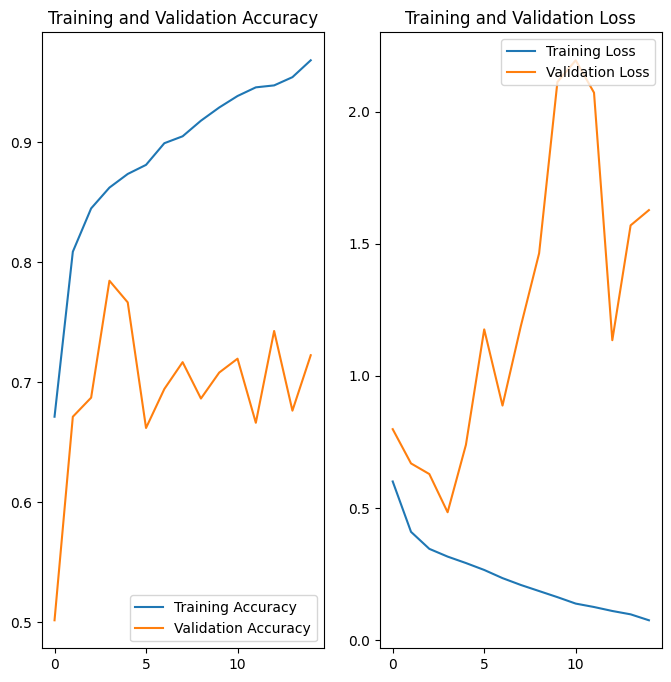

In [53]:
# plot history
train_acc_dl_lstm = hist_dl_lstm.history['accuracy']
valid_acc_dl_lstm = hist_dl_lstm.history['val_accuracy']

train_loss_dl_lstm = hist_dl_lstm.history['loss']
valid_loss_dl_lstm = hist_dl_lstm.history['val_loss']

epochs_range = range(15)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc_dl_lstm, label = 'Training Accuracy')
plt.plot(epochs_range, valid_acc_dl_lstm, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss_dl_lstm, label = 'Training Loss')
plt.plot(epochs_range, valid_loss_dl_lstm, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

The deep learning with LSTM model provides an improvement in validation accuracy compared to the initial deep learning model, as shown in the respective history plots, likely due to LSTM models being better at retaining memory on useful text data.

In [ ]:
# save keras to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_dl_lstm = model_to_onnx(dl_lstm, framework = 'keras',
                          transfer_learning = False,
                          deep_learning = True)

with open('dl_lstm.onnx', 'wb') as f:
    f.write(onnx_dl_lstm.SerializeToString())

In [ ]:
# generate predicted values
dl_lstm_prediction_labels = dl_lstm.predict(X_test_preproc)
dl_lstm_prediction_labels

# submit to leaderboard
mycompetition.submit_model(model = 'dl_lstm.onnx',
                                 preprocessor = preprocessor,
                                 prediction_submission = dl_lstm_prediction_labels)

57/57 [==============================] - 4s 35ms/step
Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 521

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# compare models from competition
data = mycompetition.compare_models([1, 2], verbose = 1)
mycompetition.stylize_compare(data)

,Model_1_Layer,Model_1_Shape,Model_1_Params,Model_2_Layer,Model_2_Shape,Model_2_Params
0,Embedding,"[None, 40, 16]",160000.000000,Embedding,"[None, 40, 16]",160000
1,Flatten,"[None, 640]",0.000000,LSTM,"[None, 40, 32]",6272
2,Dense,"[None, 2]",1282.000000,LSTM,"[None, 32]",8320
3,None,None,nan,Flatten,"[None, 32]",0
4,None,None,nan,Dense,"[None, 2]",66


## Additional models

In [ ]:
! pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


**Deep Learning -- Conv1D**

In [31]:
from tensorflow.keras.layers import Conv1D, Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

In [32]:
# deep learning model with conv1D
np.random.seed(5)

import tensorflow as tf

# define model
dl_conv1d = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim = 50, input_length = 40),
    tf.keras.layers.Conv1D(kernel_size = 20, filters = 32, activation = 'softmax'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation = 'sigmoid') # use sigmoid for binary classification
  ])

# compile model
dl_conv1d.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# fit model
hist_dl_conv1d = dl_conv1d.fit(X_train_preproc,
                           y_train_labels_enc,
                           epochs = 15,
                           verbose = 1,
                           validation_split = 0.2)

Epoch 1/15
173/173 [==============================] - 3s 13ms/step - loss: 0.6676 - accuracy: 0.6149 - val_loss: 0.9047 - val_accuracy: 0.1488
Epoch 2/15
173/173 [==============================] - 2s 13ms/step - loss: 0.5602 - accuracy: 0.6954 - val_loss: 0.7784 - val_accuracy: 0.5376
Epoch 3/15
173/173 [==============================] - 3s 18ms/step - loss: 0.3945 - accuracy: 0.8186 - val_loss: 0.5251 - val_accuracy: 0.7652
Epoch 4/15
173/173 [==============================] - 4s 23ms/step - loss: 0.3305 - accuracy: 0.8524 - val_loss: 0.7895 - val_accuracy: 0.6171
Epoch 5/15
173/173 [==============================] - 2s 13ms/step - loss: 0.2931 - accuracy: 0.8757 - val_loss: 0.7560 - val_accuracy: 0.6698
Epoch 6/15
173/173 [==============================] - 2s 12ms/step - loss: 0.2619 - accuracy: 0.8947 - val_loss: 0.6931 - val_accuracy: 0.7225
Epoch 7/15
173/173 [==============================] - 2s 13ms/step - loss: 0.2345 - accuracy: 0.9091 - val_loss: 0.6346 - val_accuracy: 0.7464

In [ ]:
# return model summary
dl_conv1d.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_62 (Embedding)    (None, 40, 50)            250000    
                                                                 
 conv1d_57 (Conv1D)          (None, 21, 32)            32032     
                                                                 
 flatten_17 (Flatten)        (None, 672)               0         
                                                                 
 dense_54 (Dense)            (None, 2)                 1346      
                                                                 
Total params: 283378 (1.08 MB)
Trainable params: 283378 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# save model and model history
dl_conv1d.save('dl_conv1d.keras')
dl_conv1d.save('dl_conv1d.h5')

np.save('dl_conv1d_hist.npy', dl_conv1d.history)

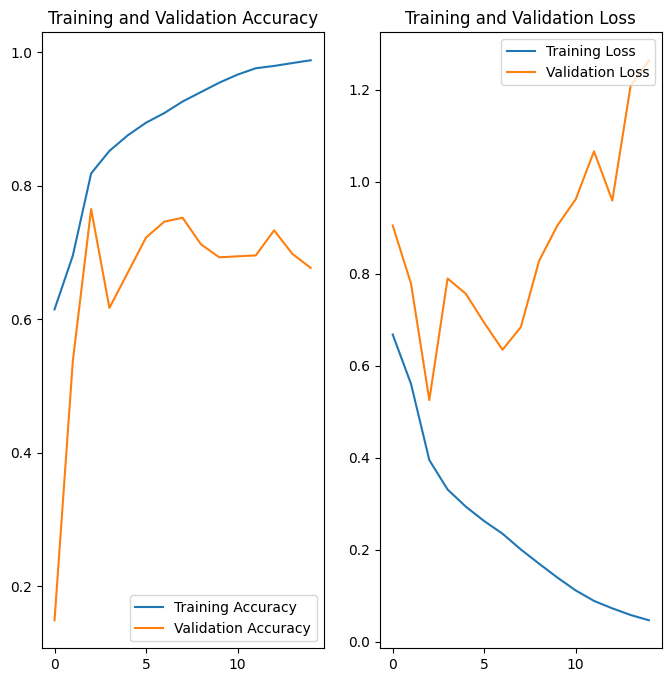

In [48]:
# plot history
import matplotlib.pyplot as plt

train_acc_dl_conv1d = hist_dl_conv1d.history['accuracy']
valid_acc_dl_conv1d = hist_dl_conv1d.history['val_accuracy']

train_loss_dl_conv1d = hist_dl_conv1d.history['loss']
valid_loss_dl_conv1d = hist_dl_conv1d.history['val_loss']

epochs_range = range(15)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc_dl_conv1d, label = 'Training Accuracy')
plt.plot(epochs_range, valid_acc_dl_conv1d, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss_dl_conv1d, label = 'Training Loss')
plt.plot(epochs_range, valid_loss_dl_conv1d, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

**Transfer Learning -- GloVe Embeddings**

In [ ]:
# keras docs: https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [34]:
# retrieve glove embeddings from Stanford
! wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-05-01 00:20:11--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-05-01 00:20:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.03MB/s    in 2m 39s  

2024-05-01 00:22:51 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [54]:
! unzip glove.6B.zip

In [36]:
glove_data = '/content/glove.6B.100d.txt'
glove_file = open(glove_data, 'r')

In [37]:
# map words to embeddings
embeddings_index = {}

for line in glove_file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs

glove_file.close()

In [42]:
# create embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [43]:
from keras.layers import Embedding

embedding_layer = Embedding(len(tokenizer.word_index) + 1, 100,
                            weights = [embedding_matrix],
                            input_length = 40,
                            trainable = False)

In [44]:
# transfer learning model with glove embeddings
np.random.seed(5)

import tensorflow as tf

# define model
tl_glove = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 100,
                            weights = [embedding_matrix],
                            input_length = 40,
                            trainable = False),
    tf.keras.layers.Conv1D(kernel_size = 10, filters = 32, activation = 'softmax'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(kernel_size = 10, filters = 32, activation = 'softmax'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation = 'sigmoid') # use sigmoid for binary classification
  ])

# compile model
tl_glove.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# fit model
hist_tl_glove = tl_glove.fit(X_train_preproc,
                           y_train_labels_enc,
                           epochs = 15,
                           verbose = 1,
                           validation_split = 0.2)

Epoch 1/15
173/173 [==============================] - 3s 12ms/step - loss: 0.6682 - accuracy: 0.6149 - val_loss: 0.8521 - val_accuracy: 0.1488
Epoch 2/15
173/173 [==============================] - 2s 11ms/step - loss: 0.6450 - accuracy: 0.6167 - val_loss: 0.7901 - val_accuracy: 0.2753
Epoch 3/15
173/173 [==============================] - 2s 11ms/step - loss: 0.5904 - accuracy: 0.6850 - val_loss: 0.7830 - val_accuracy: 0.4964
Epoch 4/15
173/173 [==============================] - 3s 16ms/step - loss: 0.5382 - accuracy: 0.7404 - val_loss: 0.7028 - val_accuracy: 0.6236
Epoch 5/15
173/173 [==============================] - 3s 18ms/step - loss: 0.5014 - accuracy: 0.7681 - val_loss: 0.6736 - val_accuracy: 0.6669
Epoch 6/15
173/173 [==============================] - 3s 17ms/step - loss: 0.4698 - accuracy: 0.7948 - val_loss: 0.7354 - val_accuracy: 0.6322
Epoch 7/15
173/173 [==============================] - 3s 17ms/step - loss: 0.4443 - accuracy: 0.8114 - val_loss: 0.6352 - val_accuracy: 0.7124

In [ ]:
# return model summary
tl_glove.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_104 (Embedding)   (None, 40, 100)           1383700   
                                                                 
 conv1d_136 (Conv1D)         (None, 31, 32)            32032     
                                                                 
 max_pooling1d_49 (MaxPooli  (None, 10, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_137 (Conv1D)         (None, 1, 32)             10272     
                                                                 
 flatten_58 (Flatten)        (None, 32)                0         
                                                                 
 dense_95 (Dense)            (None, 2)                 66        
                                                     

In [45]:
# save model and model history
tl_glove.save('tl_glove.keras')
tl_glove.save('tl_glove.h5')

np.save('tl_glove_hist.npy', tl_glove.history)

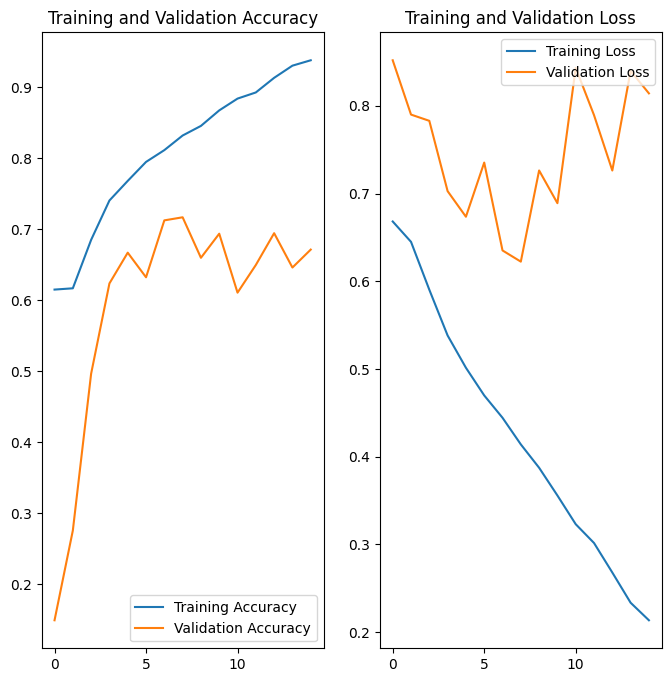

In [50]:
import matplotlib.pyplot as plt

train_acc_tl_glove = hist_tl_glove.history['accuracy']
valid_acc_tl_glove = hist_tl_glove.history['val_accuracy']

train_loss_tl_glove = hist_tl_glove.history['loss']
valid_loss_tl_glove = hist_tl_glove.history['val_loss']

epochs_range = range(15)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc_tl_glove, label = 'Training Accuracy')
plt.plot(epochs_range, valid_acc_tl_glove, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss_tl_glove, label = 'Training Loss')
plt.plot(epochs_range, valid_loss_tl_glove, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

**BERT classifier**

In [ ]:
# keras docs: https://keras.io/api/keras_nlp/models/bert/
#             https://keras.io/api/keras_nlp/models/bert/bert_classifier/

In [ ]:
pip install -U 'tensorflow-text==2.13.*'

In [ ]:
import keras_nlp

In [ ]:
bert_tokenizer_prep = Tokenizer(num_words = 2000)
bert_tokenizer_prep.fit_on_texts(X_train_list)

In [ ]:
vocab = X_train.to_list()

In [ ]:
# define tokenizer and preprocessor
vocab = X_train.to_list()

bert_tokenizer = keras_nlp.models.BertTokenizer(
    vocabulary = X_train)

bert_preprocessor = keras_nlp.models.BertPreprocessor(
    tokenizer = bert_tokenizer,
    sequence_length = 40)

In [ ]:
# define model
tl_bert = keras_nlp.models.BertClassifier.from_preset(
    preset = 'bert_base_en_uncased',
    preprocessor = bert_preprocessor,
    num_classes = 2
    )

In [ ]:
# compile model
tl_bert.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# fit model
hist_tl_bert = tl_bert.fit(X_train_preproc,
                           y_train_labels_enc,
                           epochs = 15,
                           verbose = 1,
                           validation_split = 0.2
                           )

**Results and discussion**

The deep learning model with LSTM exhibits the highest validation accuracies across training epochs among the four models. LSTM models are able to effectively address the vanishing gradient problem, and can offer an improvement over standard deep learning models.

Training and validation loss and accuracy reports are shown below for each of the models (i.e. deep learning base model, deep learning model with LSTM, deep learning model with Conv1D, and transfer learning with GloVe embeddings model).

In [ ]:
from tabulate import tabulate

In [ ]:
table_dl_base = tabulate(hist_dl_base.history, hist_dl_base.history)
print(' Deep Learning - Base Model: \n Training and Validation Performance \n \n', table_dl_base)

 Deep Learning - Base Model: 
 Training and Validation Performance 
 
      loss    accuracy    val_loss    val_accuracy
---------  ----------  ----------  --------------
0.663839     0.613981    0.881215        0.149566
0.578607     0.685332    0.680989        0.567197
0.436005     0.818822    0.60697         0.678468
0.324698     0.883309    0.601026        0.70159
0.247206     0.926662    0.710409        0.631503
0.18469      0.953215    0.654773        0.677023
0.13917      0.972001    0.667525        0.684249
0.105705     0.983562    0.713388        0.669075
0.0821104    0.988801    0.847892        0.640896
0.0641857    0.992594    0.854056        0.645954
0.0516909    0.994039    0.841701        0.664017
0.042061     0.9944      0.899261        0.651734
0.034227     0.996749    0.86239         0.684249
0.0291353    0.996387    0.960078        0.654624
0.024616     0.996387    0.979009        0.653179


In [ ]:
table_dl_lstm = tabulate(hist_dl_lstm.history, hist_dl_lstm.history)
print(' Deep Learning - LSTM: \n Training and Validation Performance \n \n', table_dl_lstm)

 Deep Learning - LSTM: 
 Training and Validation Performance 
 
      loss    accuracy    val_loss    val_accuracy
---------  ----------  ----------  --------------
0.598679     0.674855    0.537009        0.763006
0.411145     0.815571    0.595223        0.726156
0.348055     0.842847    0.742616        0.71026
0.31189      0.866149    0.488881        0.78685
0.292935     0.871207    0.66908         0.755058
0.253158     0.888006    1.22498         0.733382
0.227023     0.896496    0.613672        0.736994
0.215817     0.905347    1.72687         0.722543
0.204816     0.905347    1.1865          0.721821
0.160683     0.927746    2.14166         0.709538
0.134999     0.939487    1.8005          0.698699
0.114405     0.946893    2.20702         0.683526
0.105335     0.952312    2.14521         0.712428
0.0949006    0.958273    2.53658         0.672688
0.0877251    0.96297     1.02515         0.738439


In [ ]:
table_dl_conv1d = tabulate(hist_dl_conv1d.history, hist_dl_conv1d.history)
print(' Deep Learning - Conv1D \n Training and Validation Performance \n \n', table_dl_conv1d)

 Deep Learning with Conv1D: 
 Training and Validation Performance 
 
       loss    accuracy    val_loss    val_accuracy
----------  ----------  ----------  --------------
0.0405772     0.987536     1.2197         0.709538
0.0297357     0.992052     1.73709        0.623555
0.0245566     0.994039     1.41057        0.692197
0.0192338     0.994581     1.556          0.674133
0.0159054     0.994942     1.60857        0.671965
0.0158975     0.994581     1.44555        0.71026
0.0111283     0.997832     1.51995        0.691474
0.0108735     0.99729      1.63566        0.686416
0.0102662     0.996749     1.76127        0.671243
0.0101036     0.996929     1.69208        0.684971
0.00890751    0.99729      1.72304        0.696532
0.00836212    0.997471     1.67466        0.689306
0.00689404    0.998194     1.77283        0.693642
0.00649418    0.998013     1.72011        0.706647
0.00539055    0.998916     1.8849         0.680636


In [ ]:
table_tl_glove = tabulate(hist_tl_glove.history, hist_tl_glove.history)
print(' Transfer Learning - GloVe Embeddings \n Training and Validation Performance \n \n', table_tl_glove)

 Transfer Learning with GloVe Embeddings 
 Training and Validation Performance 
 
     loss    accuracy    val_loss    val_accuracy
--------  ----------  ----------  --------------
0.670479    0.614884    0.854946        0.148844
0.642723    0.615607    0.839807        0.197254
0.598915    0.672507    0.743522        0.53685
0.556944    0.718931    0.825719        0.517341
0.522641    0.75289     0.700806        0.66185
0.49798     0.772579    0.844863        0.556358
0.460591    0.796423    0.61464         0.728324
0.429733    0.815751    0.679498        0.680636
0.39364     0.841221    0.649523        0.695087
0.356449    0.864162    0.642763        0.708815
0.32001     0.884574    0.842893        0.615607
0.287242    0.905166    0.817666        0.636561
0.256352    0.919617    0.632888        0.721098
0.227497    0.932262    0.845186        0.641618
0.199826    0.947977    0.737275        0.689306


### For the inference pipeline, please see **assignment3_part2_group5_jc5635_frontend_inference_pipeline.ipynb** and associated **.py** files.